In [157]:
# Packages
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Dir
dir = os.getcwd()
subset = 'subset'
droplet = 'tabula-muris-senis-droplet-processed-official-annotations.h5ad'
facs = 'tabula-muris-senis-facs-processed-official-annotations.h5ad'
fn_droplet = Path(dir, droplet)
fn_facs = Path(dir, facs)
subset_dir = Path(dir,subset)

# Set variables
# method = 'droplet'
method = 'facs'

# Read data and subsetting it
# adata = sc.read_h5ad(fn_droplet)
adata = sc.read_h5ad(fn_facs)

# View the annotations
adata.obs[:10]

/Users/hsieh/Library/Python/3.10/lib/python/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/hsieh/Library/Python/3.10/lib/python/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,A10_B000497,bulge keratinocyte,nan,nan,facs,18_53_M,male,nan,Skin,2706,1009830.0,10,9
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3212,978772.0,31,27
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,A10_B000802,bulge keratinocyte,nan,outer bulge,facs,18_47_F,female,Skin Anagen,Skin,2243,419722.0,10,9
A10_B000927_B007456_S10.mm10-plus-0-0,"CD31+, CD45+, CD31-CD45-Sca1+, CD31-CD45-Sca1-...",18m,A10_B000927,skeletal muscle satellite cell,nan,nan,facs,18_46_F,female,Muscle Diaphragm,Limb_Muscle,2789,878950.0,12,11
A10_B001361_B007505_S10.mm10-plus-0-0,Viable,18m,A10_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1237,6587.0,1,1
A10_B002452_B009020_S10.mm10-plus-0-0,Viable,18m,A10_B002452,B cell,nan,CD79a B cell,facs,18_47_F,female,nan,Spleen,2178,1794279.0,1,1
A10_B002850_B007342_S10.mm10-plus-0-0,Multiple,18m,A10_B002850,bulge keratinocyte,nan,outer bulge,facs,18_47_F,female,nan,Skin,3731,1734592.0,10,9
A10_B003262_B007459_S10.mm10-plus-0-0,"CD31+, CD45+, CD31-CD45-Sca1+, CD31-CD45-Sca1-...",18m,A10_B003262,skeletal muscle satellite cell,nan,nan,facs,18_45_M,male,Limb_Muscle,Diaphragm,1089,1426060.0,12,11
A10_B003294_B007450_S10.mm10-plus-0-0,"CD31+, CD45+, CD31-CD45-Sca1+, CD31-CD45-Sca1-...",18m,A10_B003294,skeletal muscle satellite cell,nan,nan,facs,18_47_F,female,Muscle forelimb and hindlimb,Limb_Muscle,1838,1775407.0,12,11


In [169]:
# Check how many categories in selected variables
df_obs = pd.DataFrame(adata.obs)
print("-------------------original data--------------------------")
print(df_obs['tissue'].cat.categories)
print(df_obs['age'].cat.categories)

# Subset data from large intestine
Tissue = ['Large_Intestine']
adata_subset = adata[adata.obs['tissue'].isin(Tissue)]
print("-------------------subsetted data--------------------------")
print(adata_subset)

df_subset_obs = pd.DataFrame(adata_subset.obs)
print(df_subset_obs['tissue'].cat.categories)
print(df_subset_obs['age'].cat.categories)
print(df_subset_obs['cell_ontology_class'].cat.categories)

-------------------original data--------------------------
Index(['Aorta', 'BAT', 'Bladder', 'Brain_Myeloid', 'Brain_Non-Myeloid',
       'Diaphragm', 'GAT', 'Heart', 'Kidney', 'Large_Intestine', 'Limb_Muscle',
       'Liver', 'Lung', 'MAT', 'Mammary_Gland', 'Marrow', 'Pancreas', 'SCAT',
       'Skin', 'Spleen', 'Thymus', 'Tongue', 'Trachea'],
      dtype='object')
Index(['3m', '18m', '21m', '24m'], dtype='object')
-------------------subsetted data--------------------------
View of AnnData object with n_obs × n_vars = 8311 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
Index(['Large_

/Users/hsieh/Library/Python/3.10/lib/python/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


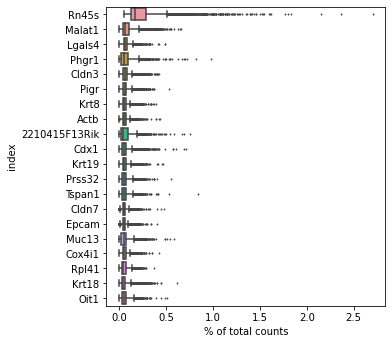

In [159]:
sc.pl.highest_expr_genes(adata_subset, n_top=20, )

In [160]:
# Filter cells
sc.pp.filter_cells(adata_subset, min_genes=200)
sc.pp.filter_genes(adata_subset, min_cells=3)
print(adata_subset)

AnnData object with n_obs × n_vars = 8311 × 22075
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


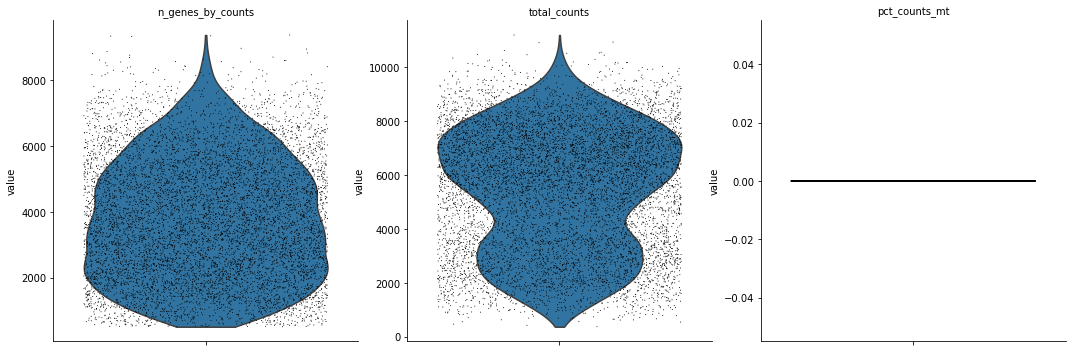

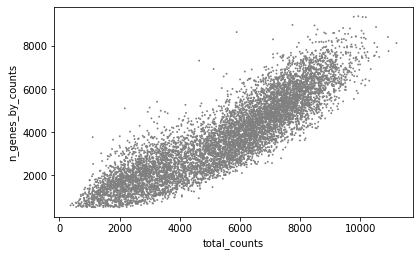

In [161]:
adata_subset.var['mt'] = adata_subset.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_subset, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_subset, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata_subset, x='total_counts', y='n_genes_by_counts')

In [162]:
sc.pp.normalize_total(adata_subset, target_sum=1e4)

In [163]:
# log transform the raw data
# and set the 'raw' attribute to the natural logarithmized data
sc.pp.log1p(adata_subset)

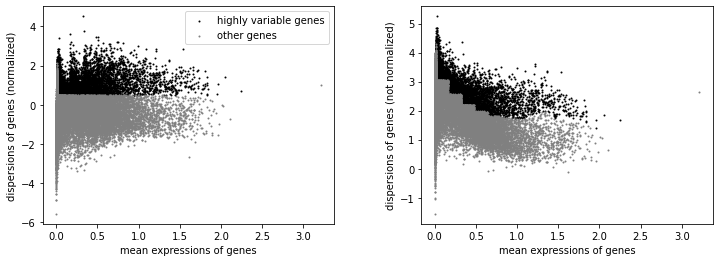

In [164]:
sc.pp.highly_variable_genes(adata_subset, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_subset)

In [165]:
adata_subset = adata_subset[:, adata_subset.var.highly_variable]

In [166]:
adata_subset.raw = adata_subset

/Users/hsieh/Library/Python/3.10/lib/python/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


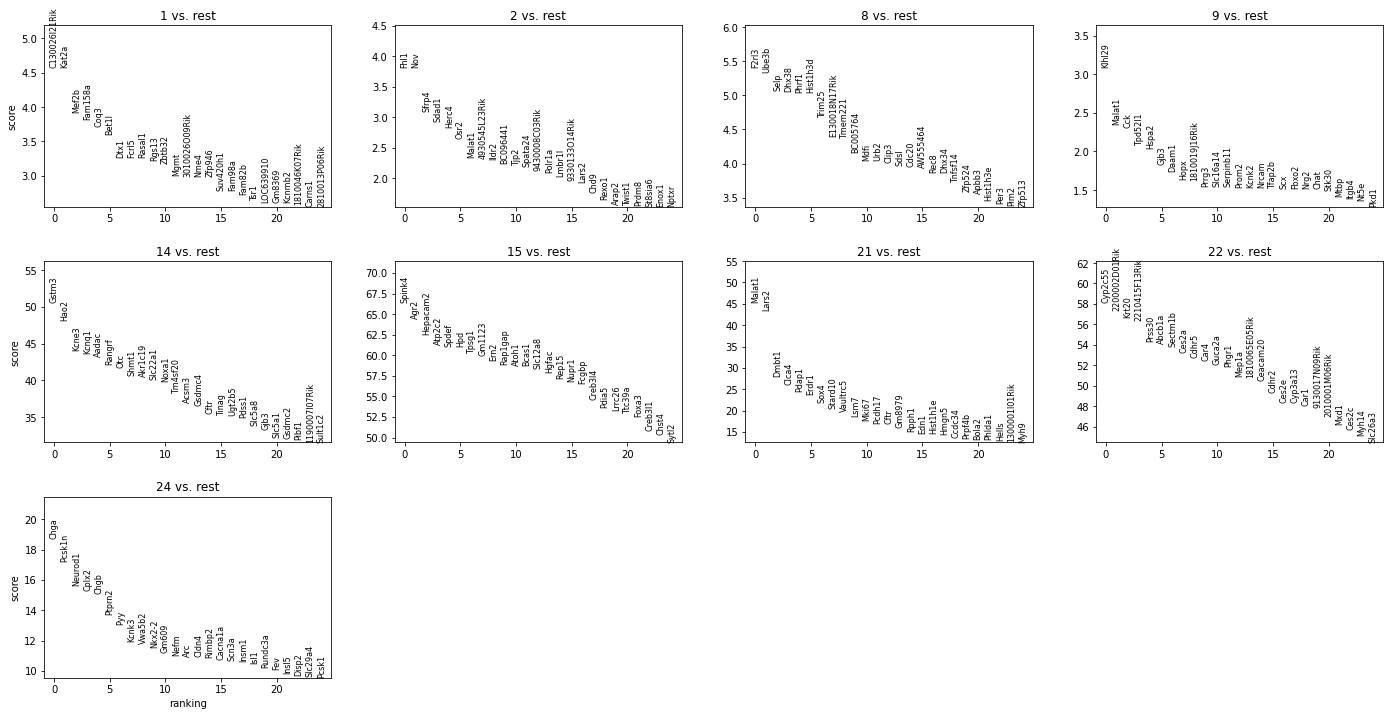

In [167]:
Cluster = ['28','0','49','44']
adata_subset = adata_subset[~adata_subset.obs['leiden'].isin(Cluster)]
sc.tl.rank_genes_groups(adata_subset, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_subset, n_genes=25, sharey=False)

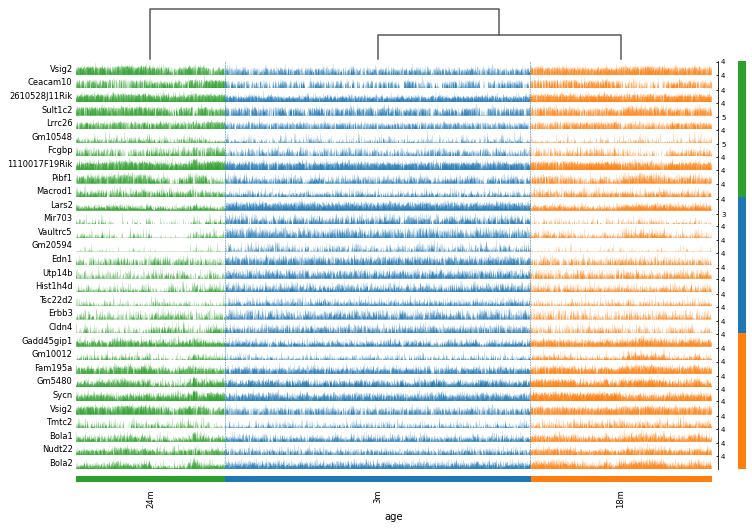

In [168]:
# Perform the differential analysis
sc.tl.rank_genes_groups(adata_subset, groupby='age', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10)

# plot the result
sc.pl.rank_genes_groups_tracksplot(adata_subset, groupby='age')